## Problem Statement

Use the churn data set to perform the necessary data cleaning, feature selection, data pre-processing etc to build the best predictive model for predicting the churn (Exited) Variable. 

## Details about the dataset:
It consists of 10000 observations and 13 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### **Variables:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [1]:
# Import of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [2]:
# Reading the dataset
df = pd.read_csv("Churn_Modelling.csv", index_col=0)
df.columns = map(str.lower, df.columns)

# Preliminary Checks

In [3]:
# Number of Rows in the data
len(df)

10000

In [4]:
# The size of the data set was examined
df.shape  # It consists of 10000 observation units and 13 variables.

(10000, 13)

In [5]:
# Extract the top n observations from the data
df.head(10)

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   
6            15574012       Chu          645     Spain    Male   44       8   
7            15592531  Bartlett          822    France    Male   50       7   
8            15656148    Obinna          376   Germany  Female   29       4   
9            15792365        He          501    France    Male   44       4   
10           15592389        H?          684    France    Male   27       2   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   
6          113755.78              2          1               0   
7               0.00              2          1               1   
8          115046.74              4          1               0   
9          142051.07              2          0               1   
10         134603.88              1          1               1   

           estimatedsalary  exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0  
6                149756.71       1  
7                 10062.80       0  
8                119346.88       1  
9                 74940.50       0  
10                71725.73       0

In [6]:
# Extracts the last n observations
df.tail(10)

customerid      surname  creditscore geography  gender  age  \
RowNumber                                                                
9991         15798964   Nkemakonam          714   Germany    Male   33   
9992         15769959  Ajuluchukwu          597    France  Female   53   
9993         15657105  Chukwualuka          726     Spain    Male   36   
9994         15569266       Rahman          644    France    Male   28   
9995         15719294         Wood          800    France  Female   29   
9996         15606229     Obijiaku          771    France    Male   39   
9997         15569892    Johnstone          516    France    Male   35   
9998         15584532          Liu          709    France  Female   36   
9999         15682355    Sabbatini          772   Germany    Male   42   
10000        15628319       Walker          792    France  Female   28   

           tenure    balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                                
9991            3   35016.60              1          1               0   
9992            4   88381.21              1          1               0   
9993            2       0.00              1          1               0   
9994            7  155060.41              1          1               0   
9995            2       0.00              2          0               0   
9996            5       0.00              2          1               0   
9997           10   57369.61              1          1               1   
9998            7       0.00              1          0               1   
9999            3   75075.31              2          1               0   
10000           4  130142.79              1          1               0   

           estimatedsalary  exited  
RowNumber                           
9991              53667.08       0  
9992              69384.71       1  
9993             195192.40       0  
9994              29179.52       0  
9995             167773.55       0  
9996              96270.64       0  
9997             101699.77       0  
9998              42085.58       1  
9999              92888.52       1  
10000             38190.78       0

In [7]:
# Extract randomly some defined percentage of observations
df.sample(frac = 0.01)

customerid           surname  creditscore geography  gender  age  \
RowNumber                                                                     
5065         15671243                Y?          558    France  Female   47   
8069         15797710          Saunders          619   Germany    Male   29   
4274         15804787  Onyemauchechukwu          562    France    Male   75   
4729         15765650          Chigolum          501   Germany    Male   40   
4077         15676404          Kirillov          672    France  Female   50   
4847         15693200              King          752    France  Female   36   
6230         15669741               Hou          777    France    Male   36   
2189         15799211          Anenechi          708     Spain  Female   32   
1393         15730540           Simpson          794     Spain    Male   45   
3348         15694510     Ifeanyichukwu          725    France    Male   45   
4702         15629787                Tu          652    France    Male   27   
4356         15593636            Cardus          657    France  Female   39   
4344         15654577          Alexeeva          549   Germany    Male   54   
5501         15641877              Ross          681    France    Male   47   
3927         15581280          Atkinson          714   Germany    Male   29   
3505         15700710          Chiebuka          490    France  Female   37   
3757         15783541            Fomina          755    France    Male   31   
2680         15725698         Panicucci          520     Spain  Female   35   
7536         15737542             Davey          611   Germany  Female   36   
3064         15578738              Tuan          609    France    Male   32   
9976         15666295             Smith          610   Germany    Male   50   
9808         15594915             Crist          649    France  Female   36   
7470         15717065          Balashov          686    France  Female   35   
7282         15735572          Lawrence          629    France    Male   59   
7324         15750476          Hendrick          742     Spain    Male   24   
8843         15610226            Fenton          614    France  Female   27   
9074         15611058          Eluemuno          702   Germany  Female   60   
2361         15670205              Boyd          518   Germany  Female   41   
6252         15614520             Smith          682    France  Female   37   
4716         15738220            Bennet          800     Spain    Male   38   
393          15573456        Cunningham          648     Spain    Male   46   
6852         15779103        Cantamessa          527   Germany  Female   39   
4288         15657529              Chin          714   Germany    Male   53   
2409         15754112          Musgrove          653     Spain    Male   55   
9195         15640106             Mason          613    France    Male   40   
4726         15734987         Robertson          658    France  Female   43   
3644         15698791           Udinesi          679    France    Male   45   
2027         15603088             Rossi          451     Spain  Female   23   
7238         15753550            Levien          684    France  Female   43   
6689         15814267          Zhdanova          550    France    Male   22   
9559         15801411             Green          623     Spain    Male   46   
2103         15802351             Beers          755   Germany  Female   33   
2456         15727490             Scott          661    France    Male   47   
1434         15585282         Trevisano          755    France    Male   62   
6235         15654274            Corrie          540    France    Male   37   
9781         15617432          Folliero          816   Germany  Female   40   
7637         15673238          McCarthy          517   Germany  Female   59   
9708         15687431             Faria          642    France  Female   41   
2499         15648735            Cashin          718    Franc

In [8]:
# Try to get the entire details of a selected row
df.iloc[[1367,2356,6578]]

customerid  surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                    
1368         15627232  Jibunoh          608   Germany    Male   44       7   
2357         15614934   McEwan          625   Germany  Female   37       4   
6579         15786078  Loginov          850    France  Female   28       9   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1368       114203.47              1          1               1   
2357       142711.81              1          1               0   
6579            0.00              2          1               0   

           estimatedsalary  exited  
RowNumber                           
1368              77830.36       1  
2357              35625.41       0  
6579             185821.41       0

In [9]:
# Display the names of the columns
df.columns

Index(['customerid', 'surname', 'creditscore', 'geography', 'gender', 'age',
       'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

In [10]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
# Renaming the column names appropriately
df.rename(columns={'exited':'Target'},inplace=True)# Renames the columns

In [12]:
# Display the names of the columns
df.columns

Index(['customerid', 'surname', 'creditscore', 'geography', 'gender', 'age',
       'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'Target'],
      dtype='object')

# Exploratory Data Analysis

In [13]:
# Descriptive statistics of the data set accessed.
df.describe()

customerid   creditscore           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       numofproducts    hascrcard  isactivemember  estimatedsalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Target  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [14]:
#symmetricity of the data
df.skew()

customerid         0.001149
creditscore       -0.071607
age                1.011320
tenure             0.010991
balance           -0.141109
numofproducts      0.745568
hascrcard         -0.901812
isactivemember    -0.060437
estimatedsalary    0.002085
Target             1.471611
dtype: float64

In [15]:
# Peaked nature of the data.The deviation of the data from normality
df.kurtosis()

customerid        -1.196113
creditscore       -0.425726
age                1.395347
tenure            -1.165225
balance           -1.489412
numofproducts      0.582981
hascrcard         -1.186973
isactivemember    -1.996747
estimatedsalary   -1.181518
Target             0.165671
dtype: float64

In [16]:
# The average of the age variable was taken according to the dependent variable.
df.groupby("Target").agg("mean")

customerid  creditscore        age    tenure       balance  \
Target                                                                 
0       1.569117e+07   651.853196  37.408389  5.033279  72745.296779   
1       1.569005e+07   645.351497  44.837997  4.932744  91108.539337   

        numofproducts  hascrcard  isactivemember  estimatedsalary  
Target                                                             
0            1.544267   0.707146        0.554565     99738.391772  
1            1.475209   0.699067        0.360825    101465.677531

In [17]:
# The average of the age variable according to the gender variable was examined.
df.groupby("gender").agg({"age": "mean"})

age
gender           
Female  39.238389
Male    38.658237

In [18]:
# The average of the dependent variable according to the gender variable was examined.
df.groupby("gender").agg({"Target": "mean"})

Target
gender          
Female  0.250715
Male    0.164559

In [19]:
# The average of the dependent variable according to the geography variable was examined.
df.groupby("geography").agg({"Target": "mean"})

Target
geography          
France     0.161548
Germany    0.324432
Spain      0.166734

In [20]:
# The frequency of the dependent variable has been reached.
df["Target"].value_counts()

0    7963
1    2037
Name: Target, dtype: int64

In [21]:
# Access to those who left us through the dependent variable. (Target == 1)
churn = df[df["Target"] == 1]

In [22]:
# The first 5 observation units were reached.
churn.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
3            15619304      Onio          502    France  Female   42       8   
6            15574012       Chu          645     Spain    Male   44       8   
8            15656148    Obinna          376   Germany  Female   29       4   
17           15737452     Romeo          653   Germany    Male   58       1   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1               0.00              1          1               1   
3          159660.80              3          1               0   
6          113755.78              2          1               0   
8          115046.74              4          1               0   
17         132602.88              1          1               0   

           estimatedsalary  Target  
RowNumber                           
1                101348.88       1  
3                113931.57       1  
6                149756.71       1  
8                119346.88       1  
17                 5097.67       1

In [23]:
# Size information has been accessed.
churn.shape

(2037, 13)

In [24]:
# Who left most than the gender variable?
churn.groupby("gender").agg({"Target": "count"})

Target
gender        
Female    1139
Male       898

In [25]:
# Which country has left us the most?
churn.groupby("geography").agg({"Target": "count"})

Target
geography        
France        810
Germany       814
Spain         413

In [26]:
# Access to those who do not leave us on the dependent variable. (exited == 0)
non_churn = df[df["Target"] == 0]

In [27]:
# The first 5 observation units were reached.
non_churn.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
2            15647311      Hill          608     Spain  Female   41       1   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   
7            15592531  Bartlett          822    France    Male   50       7   
9            15792365        He          501    France    Male   44       4   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
2           83807.86              1          0               1   
4               0.00              2          0               0   
5          125510.82              1          1               1   
7               0.00              2          1               1   
9          142051.07              2          0               1   

           estimatedsalary  Target  
RowNumber                           
2                112542.58       0  
4                 93826.63       0  
5                 79084.10       0  
7                 10062.80       0  
9                 74940.50       0

In [28]:
# Size information has been accessed.
non_churn.shape

(7963, 13)

In [29]:
# Which country does not leave the most?
non_churn.groupby("geography").agg({"Target": "count"})

Target
geography        
France       4204
Germany      1695
Spain        2064

In [30]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
Target                 2
dtype: int64

In [31]:
# What are the most commonly used surnames?
df.groupby('surname')['surname'].count().sort_values(ascending=False).head(10)

surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Shih        25
Genovese    25
Yeh         25
Wright      24
Maclean     24
Name: surname, dtype: int64

In [32]:
# The most commonly used surname was examined and observed to be non-multiplexing.
df[df["surname"] == "Smith"]

customerid surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                   
235          15704769   Smith          585    France  Female   67       5   
480          15797736   Smith          658    France    Male   29       4   
746          15640059   Smith          606    France    Male   40       5   
1065         15699598   Smith          723    France  Female   20       4   
1757         15670702   Smith          618    France    Male   37       2   
2134         15726354   Smith          688    France  Female   32       6   
2318         15627212   Smith          630    France  Female   36       2   
2542         15679770   Smith          611    France  Female   61       3   
3836         15670859   Smith          718   Germany  Female   39       7   
4477         15723028   Smith          778    France    Male   33       1   
5075         15672397   Smith          598    France    Male   38       0   
5672         15805104   Smith          743    France  Female   73       6   
5715         15604158   Smith          554    France  Female   39      10   
5745         15776850   Smith          749     Spain  Female   43       1   
5850         15608873   Smith          665    France    Male   51       2   
6066         15674720   Smith          691   Germany  Female   37       7   
6231         15616954   Smith          592    France    Male   71       4   
6252         15614520   Smith          682    France  Female   37       8   
6285         15623219   Smith          596    France    Male   33       8   
6305         15653455   Smith          648    France  Female   38       2   
7018         15767729   Smith          646     Spain    Male   25       5   
7214         15623210   Smith          484   Germany  Female   55       8   
7271         15706268   Smith          697   Germany    Male   51       1   
7339         15796111   Smith          708   Germany  Female   54       8   
7540         15609987   Smith          755    France    Male   42       2   
7615         15725002   Smith          749    France    Male   37       7   
7919         15572706   Smith          589    France    Male   37       5   
8580         15702277   Smith          650    France    Male   34       4   
8633         15759690   Smith          751    France    Male   42       4   
9057         15793311   Smith          765   Germany  Female   46       8   
9921         15673020   Smith          678    France  Female   49       3   
9976         15666295   Smith          610   Germany    Male   50       1   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
235        113978.97              2          0               1   
480         80262.60              1          1               1   
746             0.00              2          1               1   
1065            0.00              2          1               1   
1757       168178.21              2          0               1   
2134       123157.95              1          1               0   
2318       110414.48              1          1               1   
2542       131583.59              4          0               1   
3836        93148.74              2          1               1   
4477            0.00              2          1               0   
5075       125487.89              1          0               0   
5672            0.00              2          0               1   
5715            0.00              2          1               1   
5745       124209.02              1          1               1   
5850            0.00              1          0               0   
6066       123067.63              1          1               1   
6231            0.00              2          0               1   
6252       148580.12              1          1               0   
6285            0.00              1          1               0   
6305  

In [33]:
# They were grouped by gender variable and looked at how many years on average they were clients.
df.groupby(["gender", "Target"]).agg({"tenure" : "mean"})

tenure
gender Target          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

In [34]:
# Min, mean and max values of all variables were taken according to the dependent variable.
df.groupby("Target").agg(["min","mean","max"])

customerid                         creditscore                  age  \
              min          mean       max         min        mean  max min   
Target                                                                       
0        15565701  1.569117e+07  15815690         405  651.853196  850  18   
1        15565706  1.569005e+07  15815656         350  645.351497  850  18   

                      tenure               balance                           \
             mean max    min      mean max     min          mean        max   
Target                                                                        
0       37.408389  92      0  5.033279  10     0.0  72745.296779  221532.80   
1       44.837997  84      0  4.932744  10     0.0  91108.539337  250898.09   

       numofproducts               hascrcard               isactivemember  \
                 min      mean max       min      mean max            min   
Target                                                                      
0                  1  1.544267   3         0  0.707146   1              0   
1                  1  1.475209   4         0  0.699067   1              0   

                     estimatedsalary                            
            mean max             min           mean        max  
Target                                                          
0       0.554565   1           90.07   99738.391772  199992.48  
1       0.360825   1           11.58  101465.677531  199808.10

In [35]:
# Isactivemember is grouped according to the hascrcard variables and the dependent variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"Target" : "count"})

Target
isactivemember hascrcard        
0              0            1401
               1            3448
1              0            1544
               1            3607

In [36]:
# Isactivemember is grouped according to hascrcard variables and the balance variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"balance" : "mean"})

balance
isactivemember hascrcard              
0              0          77825.424525
               1          76853.588646
1              0          78007.318381
               1          74962.849983

In [37]:
# The balance variable was examined according to the gender variable.
df.groupby("gender").agg({"balance": "mean"})

balance
gender              
Female  75659.369139
Male    77173.974506

In [38]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
df["NewAge"] = pd.qcut(df['age'], 5)
df.groupby("NewAge")["Target"].value_counts()

NewAge          Target
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: Target, dtype: int64

In [39]:
# The dependent variable was studied according to the gender variable and age range variable.
df.groupby(["gender","NewAge" ])["Target"].value_counts()

gender  NewAge          Target
Female  (17.999, 31.0]  0          959
                        1          107
        (31.0, 35.0]    0          670
                        1           96
        (35.0, 40.0]    0          818
                        1          189
        (40.0, 46.0]    0          525
                        1          263
        (46.0, 92.0]    1          484
                        0          432
Male    (17.999, 31.0]  0         1232
                        1           74
        (31.0, 35.0]    0          945
                        1           70
        (35.0, 40.0]    0         1109
                        1          150
        (40.0, 46.0]    0          686
                        1          222
        (46.0, 92.0]    0          587
                        1          382
Name: Target, dtype: int64

In [40]:
# How many people whose balance is 0 and do not leave?
df[(df["balance"] == 0) & (df["Target"] == 0)].shape

(3117, 14)

In [41]:
# How many people whose balance is 0 leave?
df[(df["balance"] == 0) & (df["Target"] == 1)].shape

(500, 14)

In [42]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.
df.corr()

customerid  creditscore       age    tenure   balance  \
customerid         1.000000     0.005308  0.009497 -0.014883 -0.012419   
creditscore        0.005308     1.000000 -0.003965  0.000842  0.006268   
age                0.009497    -0.003965  1.000000 -0.009997  0.028308   
tenure            -0.014883     0.000842 -0.009997  1.000000 -0.012254   
balance           -0.012419     0.006268  0.028308 -0.012254  1.000000   
numofproducts      0.016972     0.012238 -0.030680  0.013444 -0.304180   
hascrcard         -0.014025    -0.005458 -0.011721  0.022583 -0.014858   
isactivemember     0.001665     0.025651  0.085472 -0.028362 -0.010084   
estimatedsalary    0.015271    -0.001384 -0.007201  0.007784  0.012797   
Target            -0.006248    -0.027094  0.285323 -0.014001  0.118533   

                 numofproducts  hascrcard  isactivemember  estimatedsalary  \
customerid            0.016972  -0.014025        0.001665         0.015271   
creditscore           0.012238  -0.005458        0.025651        -0.001384   
age                  -0.030680  -0.011721        0.085472        -0.007201   
tenure                0.013444   0.022583       -0.028362         0.007784   
balance              -0.304180  -0.014858       -0.010084         0.012797   
numofproducts         1.000000   0.003183        0.009612         0.014204   
hascrcard             0.003183   1.000000       -0.011866        -0.009933   
isactivemember        0.009612  -0.011866        1.000000        -0.011421   
estimatedsalary       0.014204  -0.009933       -0.011421         1.000000   
Target               -0.047820  -0.007138       -0.156128         0.012097   

                   Target  
customerid      -0.006248  
creditscore     -0.027094  
age              0.285323  
tenure          -0.014001  
balance          0.118533  
numofproducts   -0.047820  
hascrcard       -0.007138  
isactivemember  -0.156128  
estimatedsalary  0.012097  
Target           1.000000

# Data Visualization

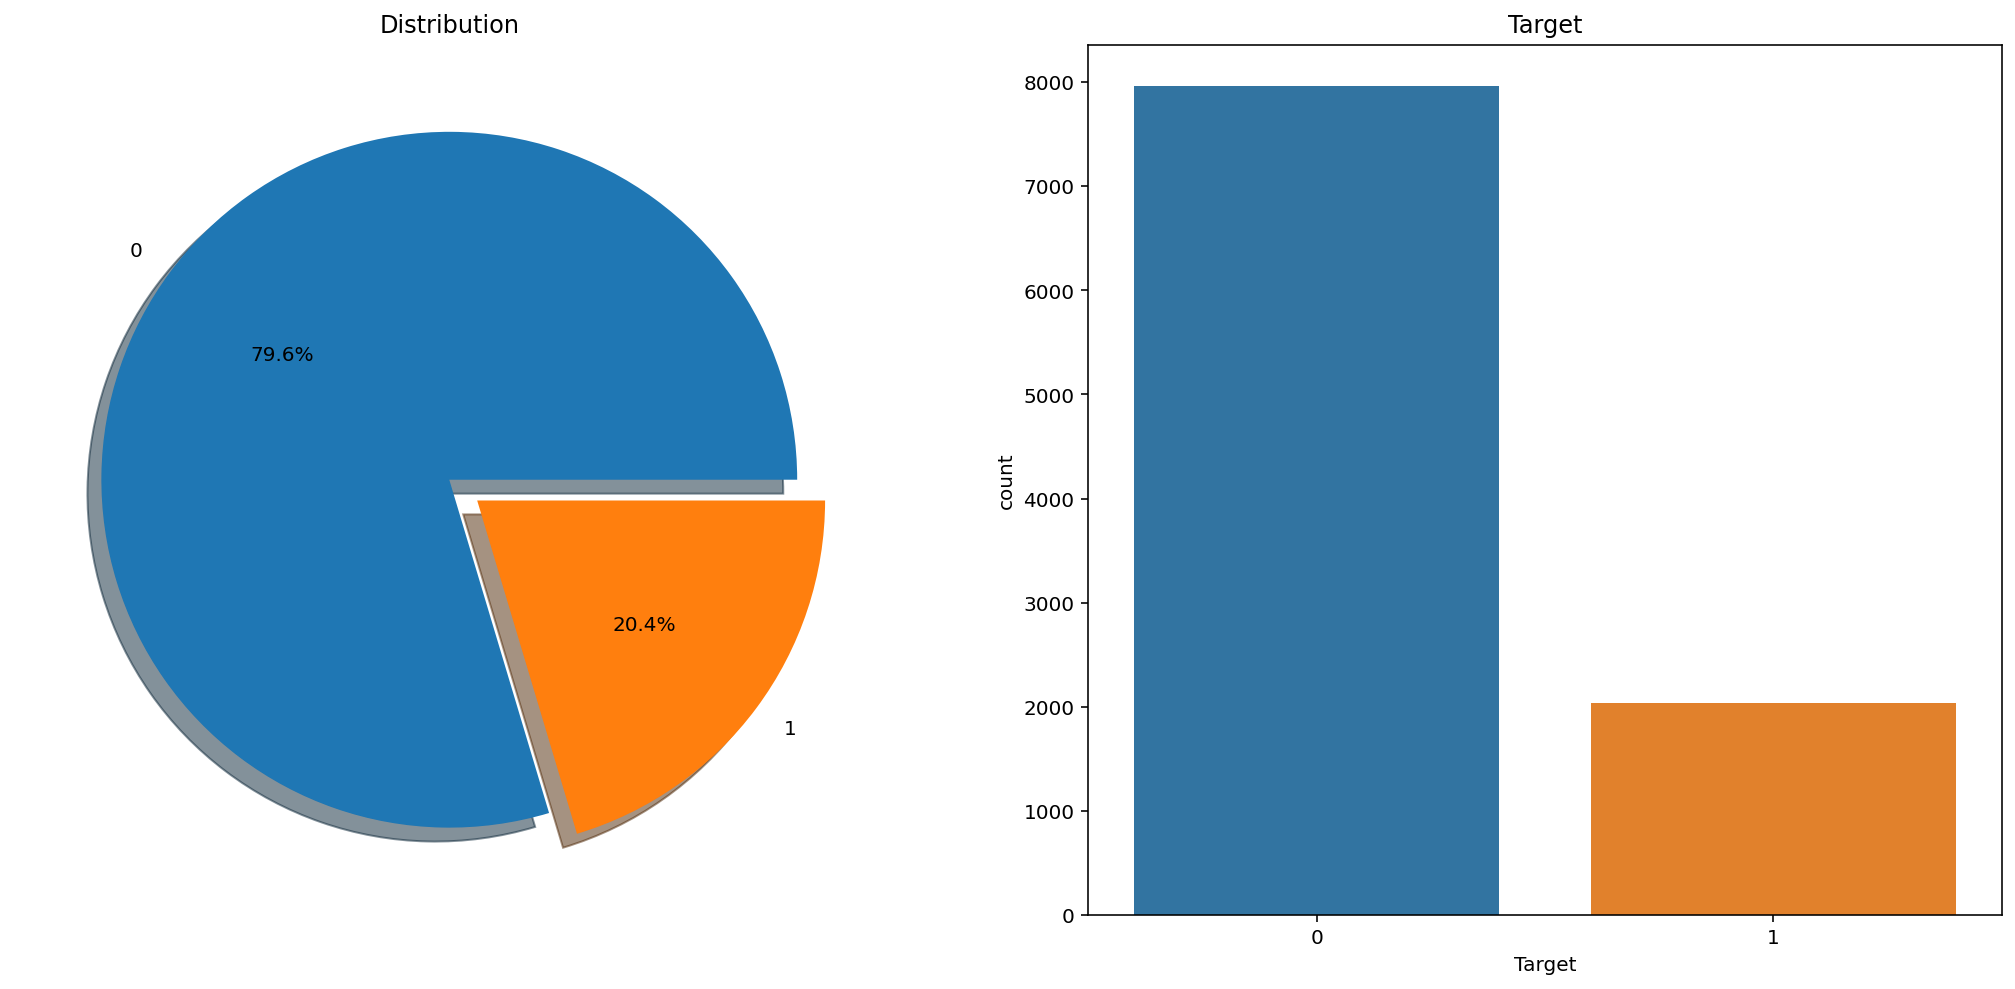

In [43]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution')
ax[0].set_ylabel('')
sns.countplot('Target',data=df,ax=ax[1])
ax[1].set_title('Target')
plt.show()

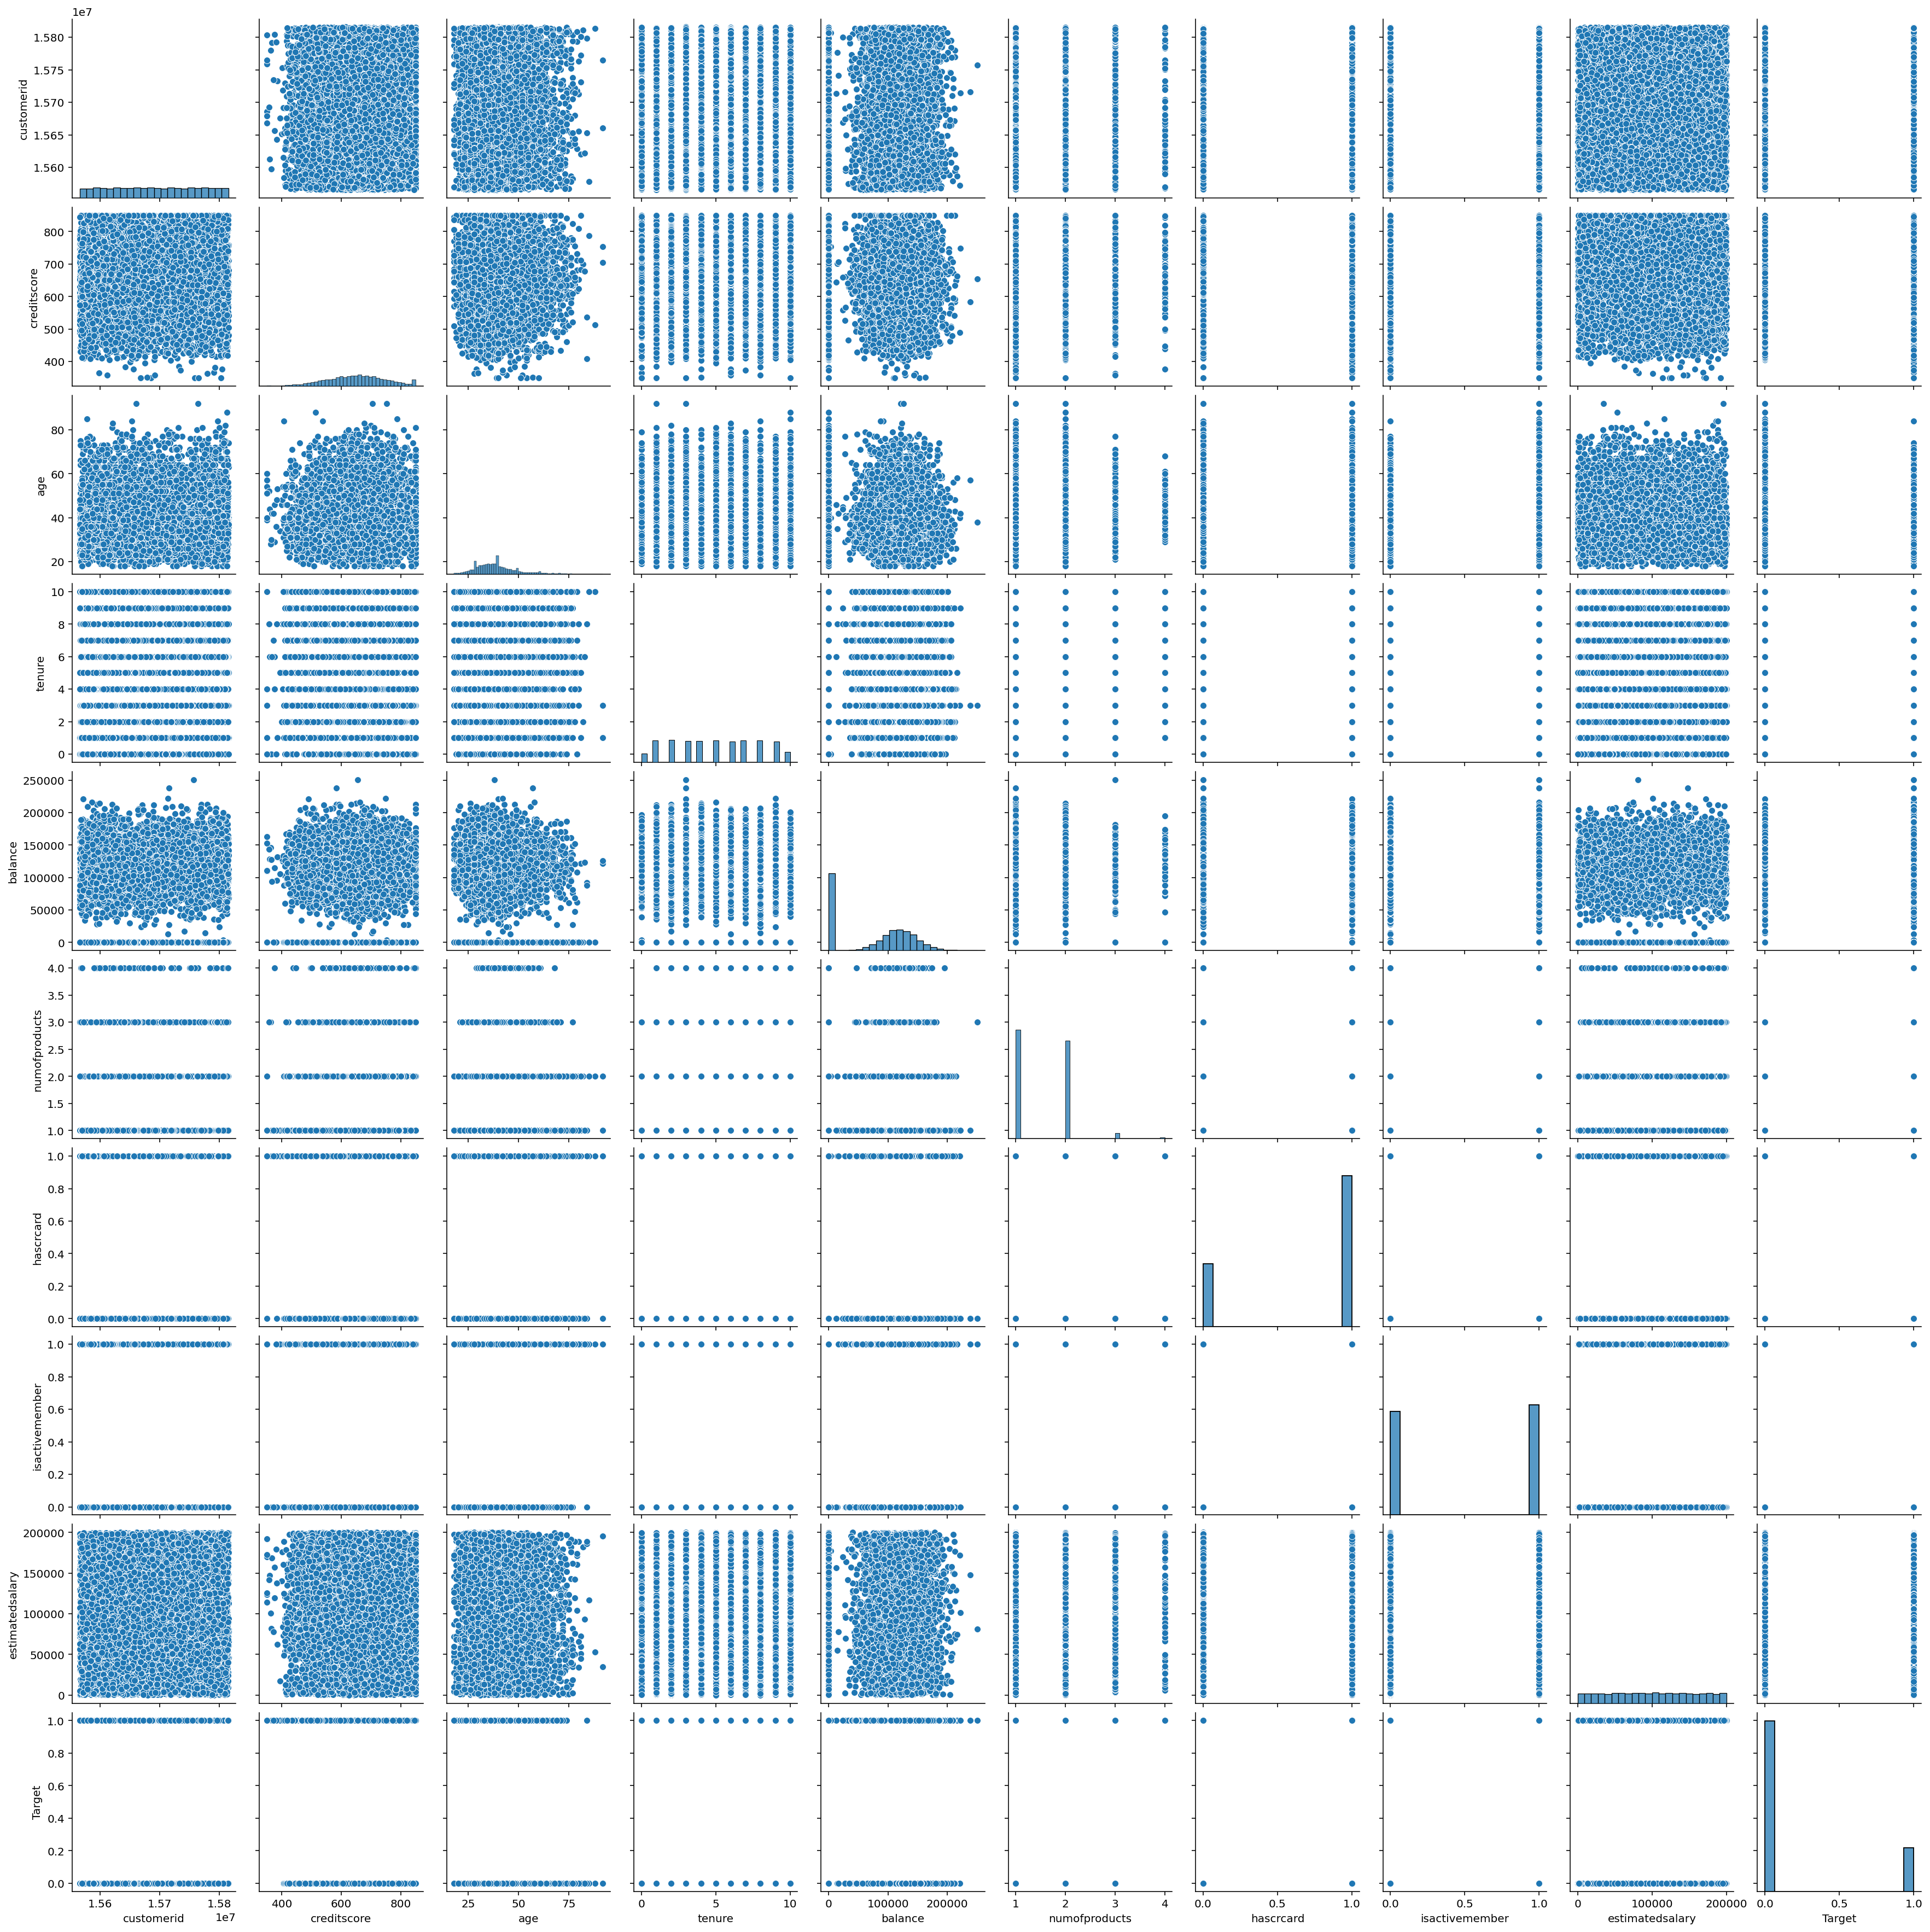

In [44]:
# Numerical - Numerical Scatter Plot - Scatter Plot Matrix # Subdivided by the Target Variable
sns.pairplot(df)

<AxesSubplot:xlabel='isactivemember', ylabel='count'>

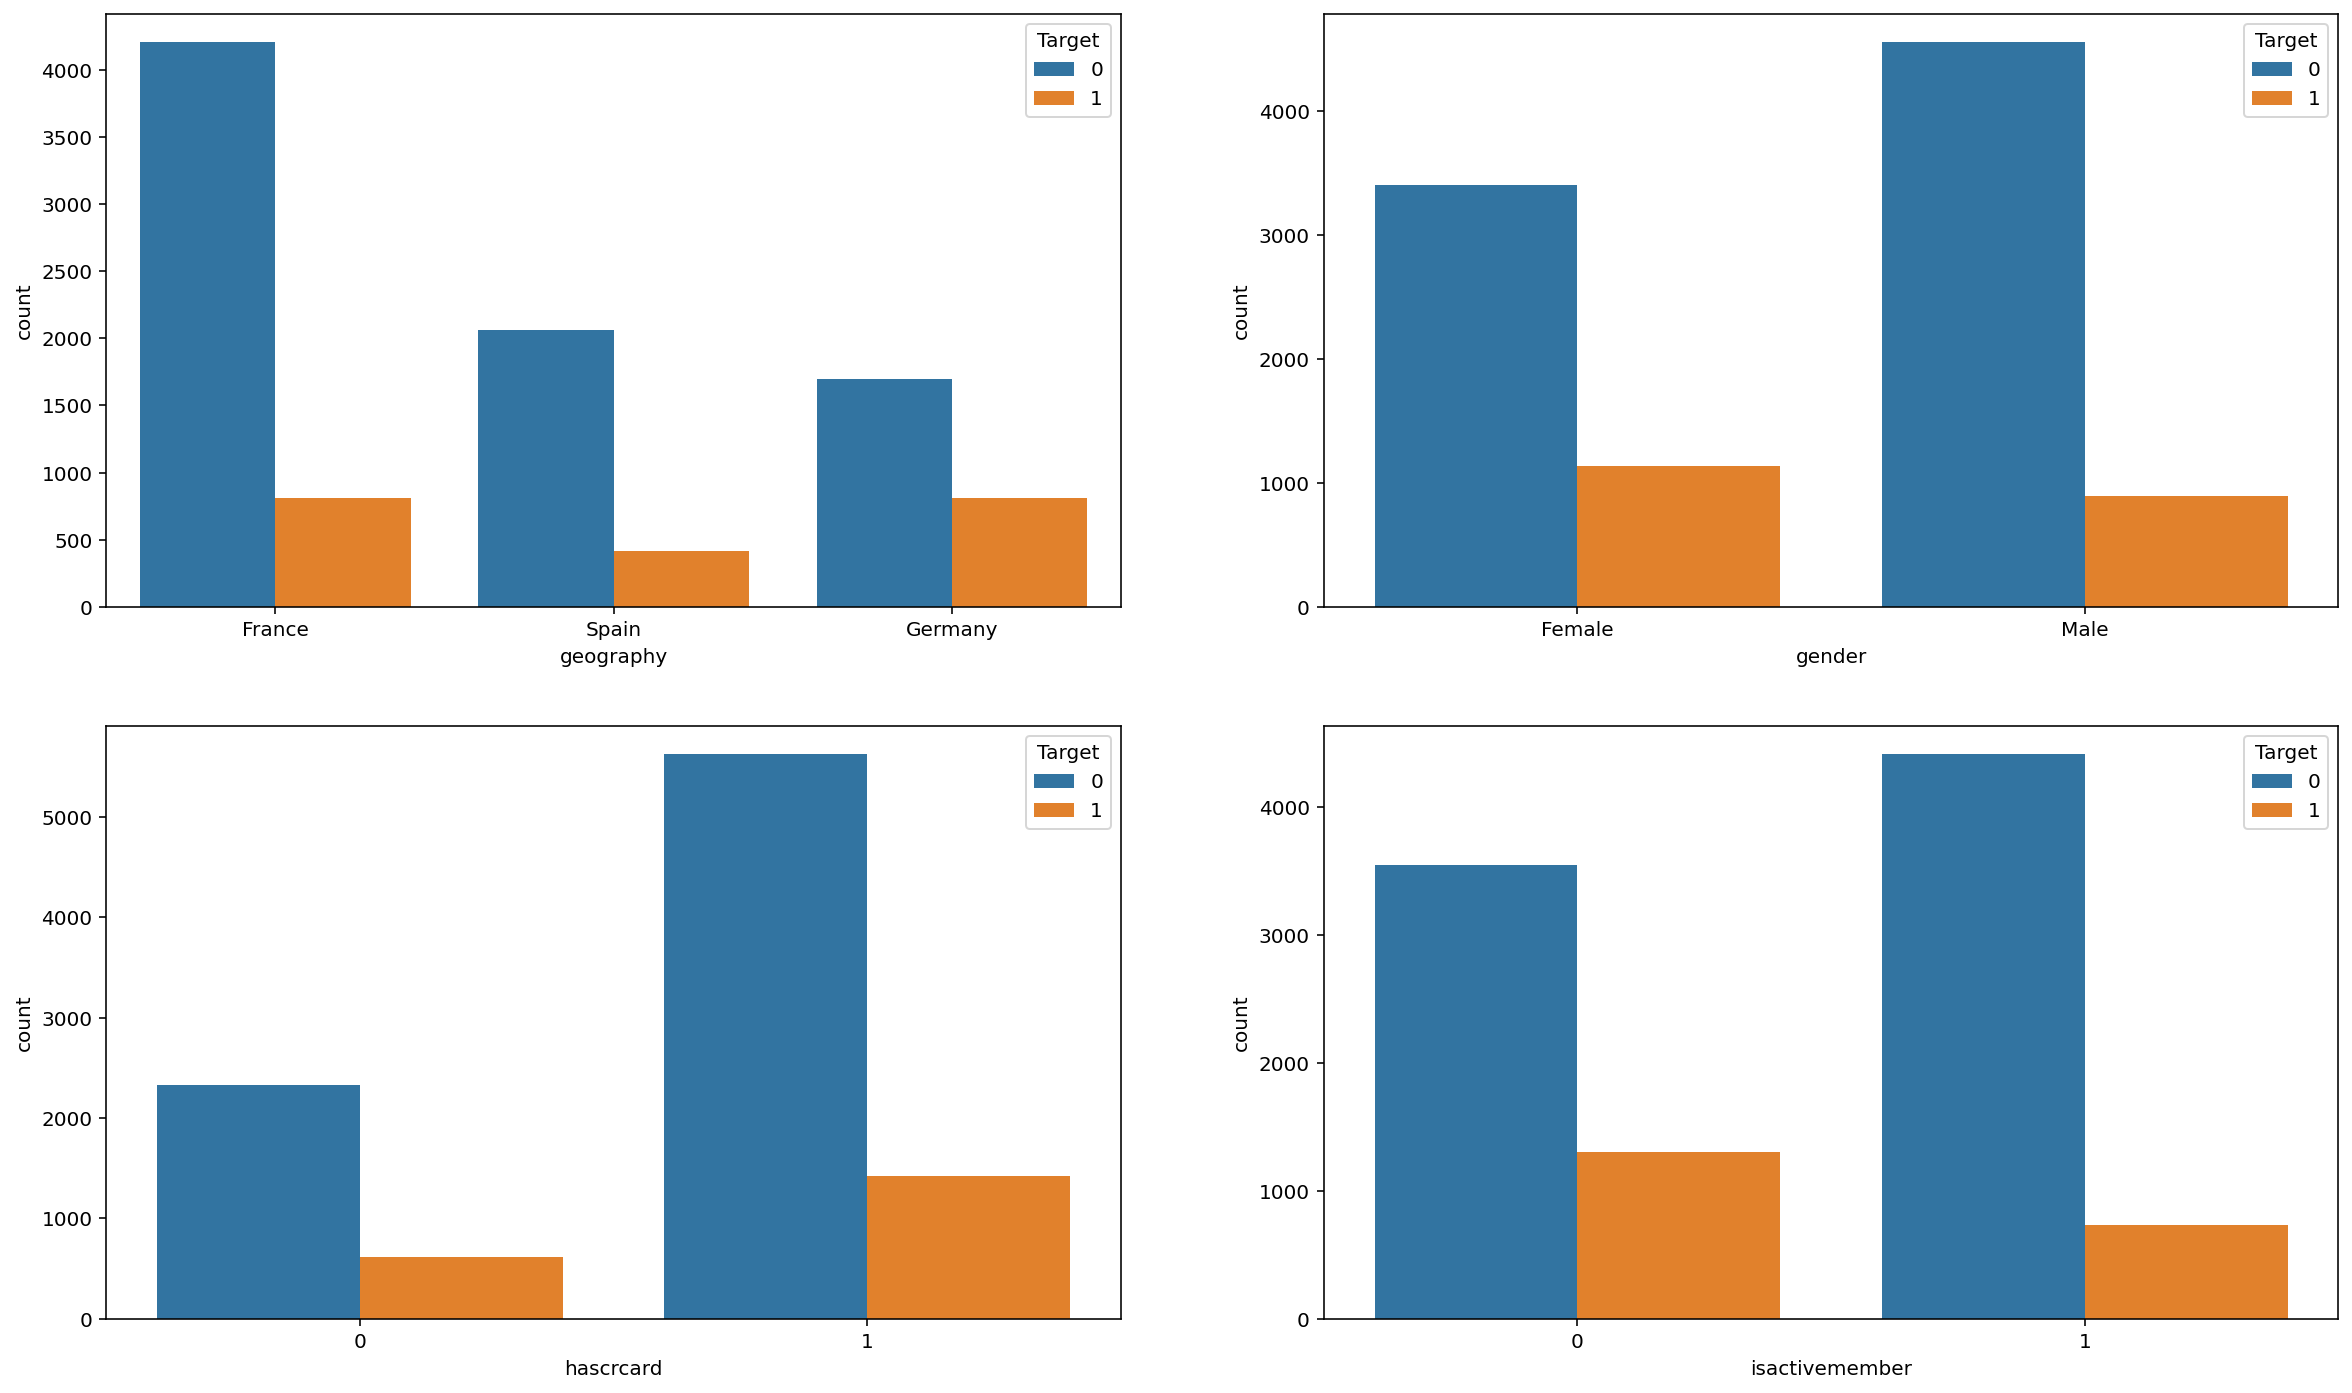

In [45]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'Target',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'Target',data = df, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'Target',data = df, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'Target',data = df, ax=axarr[1][1])

In [46]:
# The distribution of the dependent variable according to the gender variable is plotted in the pie chart.
import plotly.express as px
fig = px.pie(df, values =df.groupby("gender")["Target"].value_counts(), names = ["Female,0","Female 1","Male,0","Male,1"])
fig.show()

In [47]:
# Dependent variable was plotted according to age and geography variable.
import plotly.express as px
fig = px.bar(df,y = "Target", x = "age" , color = "geography")
fig.show()

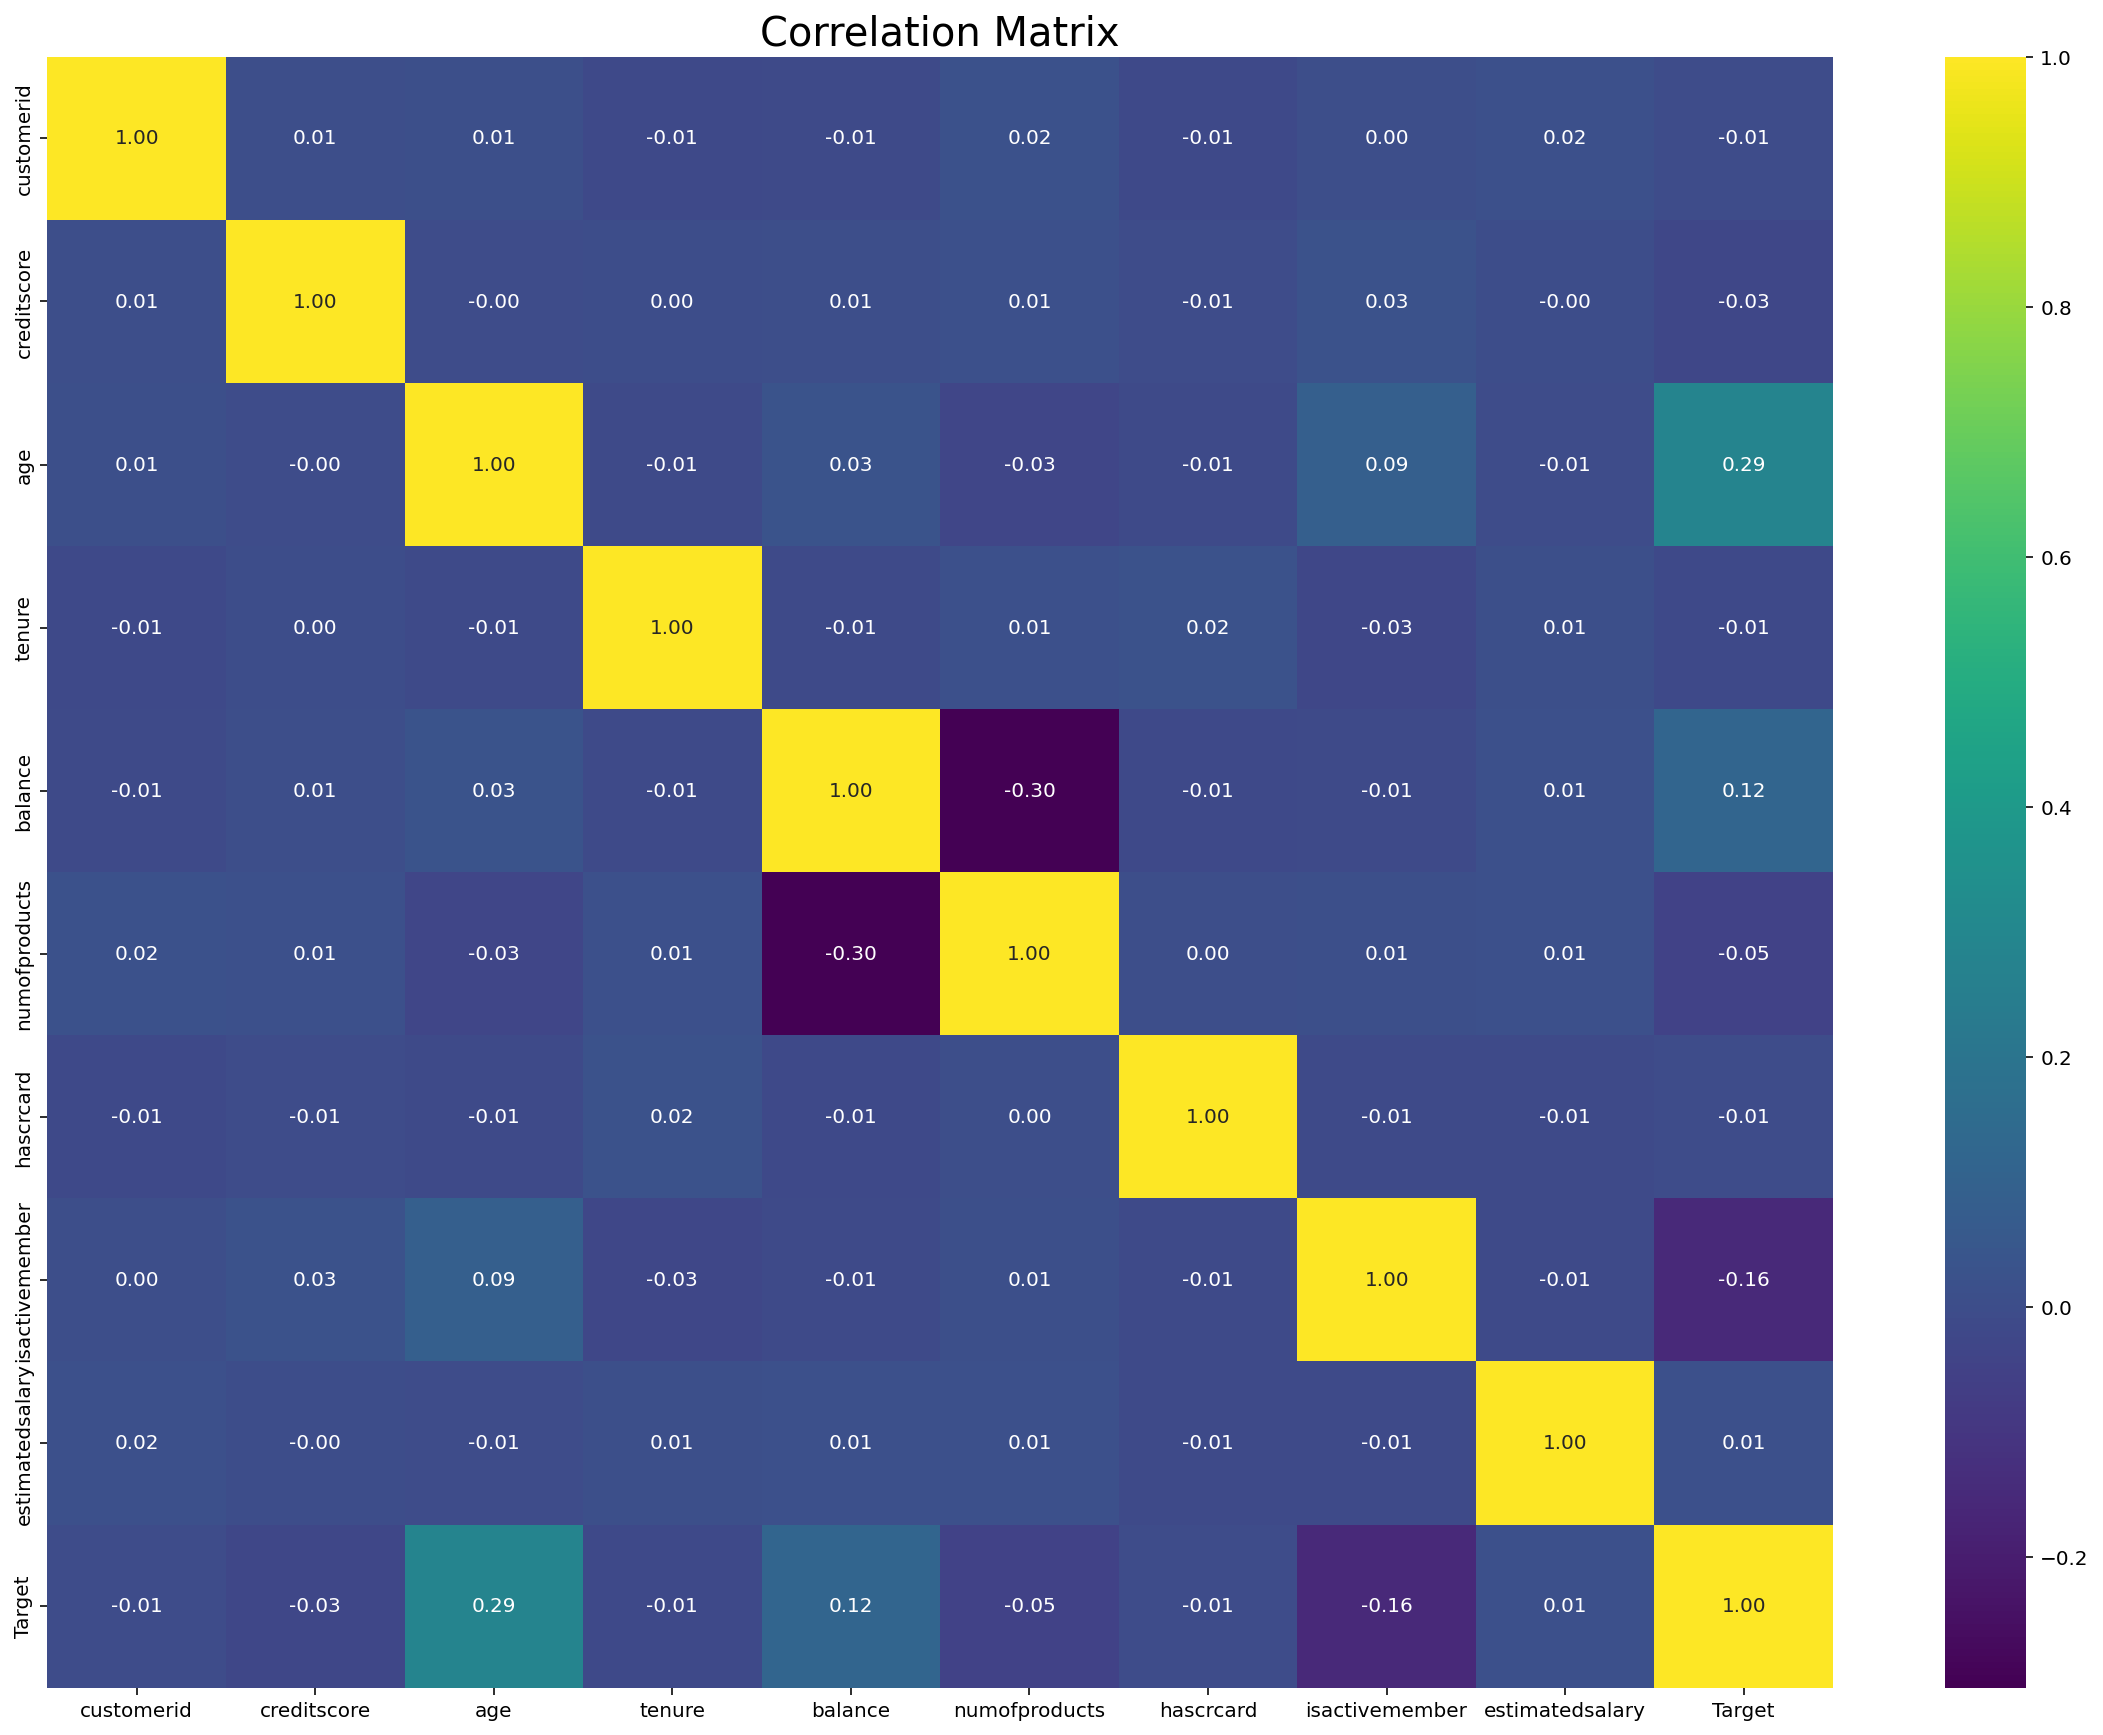

In [48]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, cmap = 'viridis' )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<AxesSubplot:xlabel='Target', ylabel='estimatedsalary'>

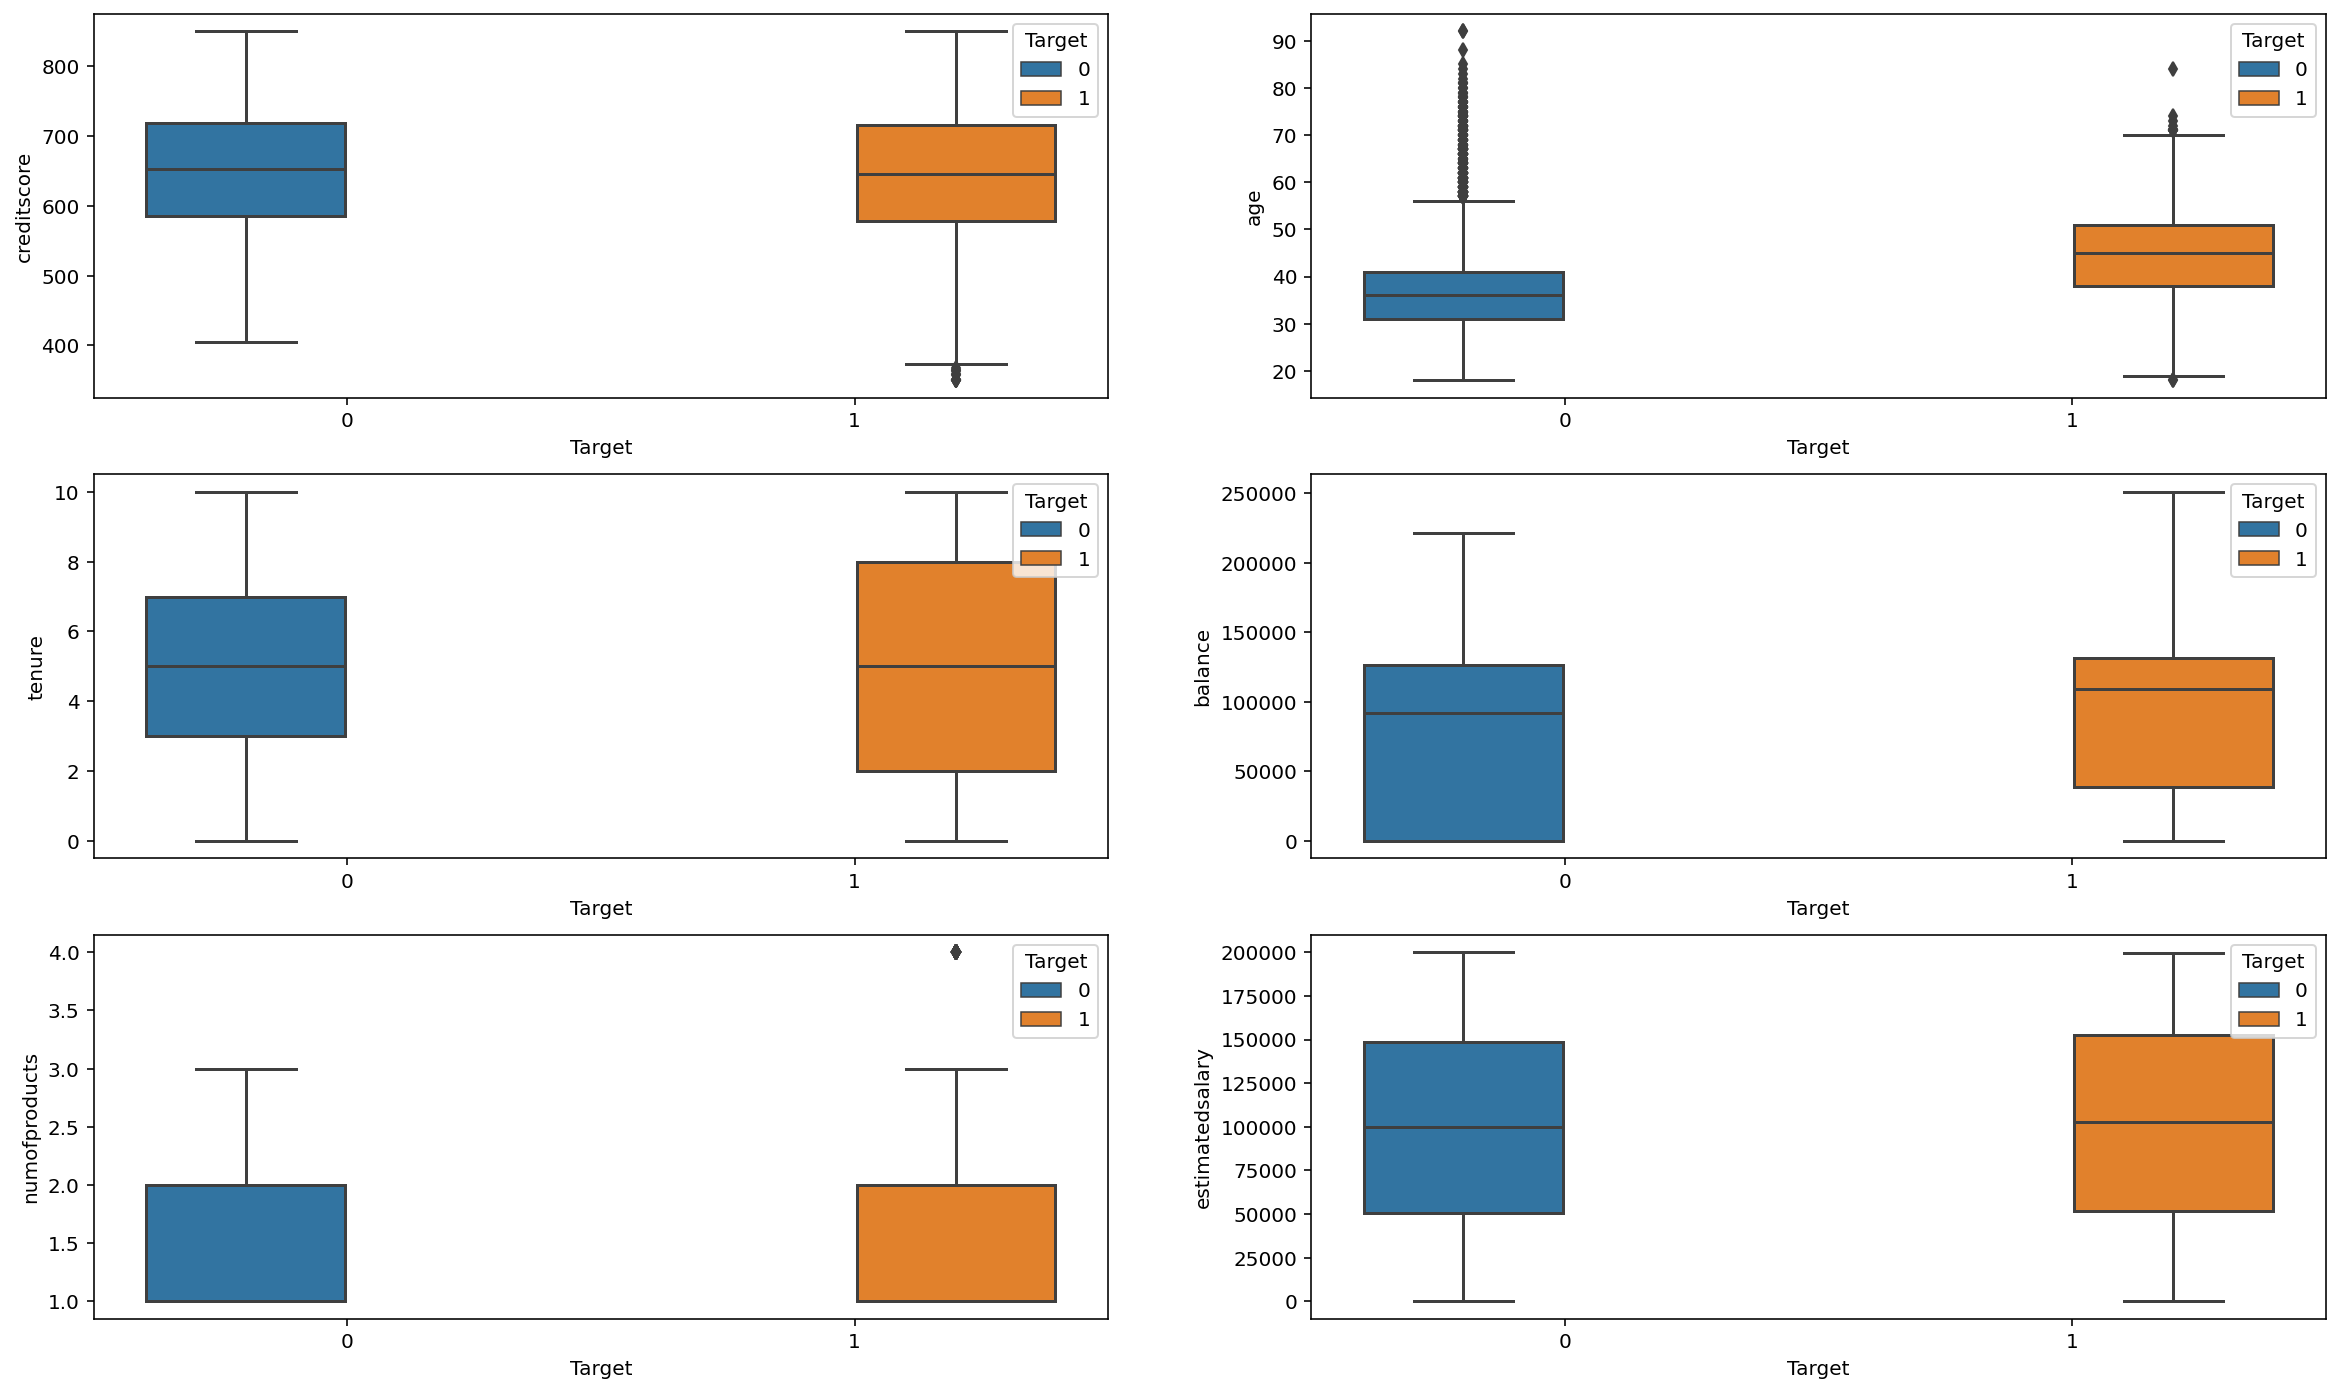

In [49]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'Target', hue = 'Target',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'Target', hue = 'Target',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'Target', hue = 'Target',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'Target', hue = 'Target',data = df, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'Target', hue = 'Target',data = df, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'Target', hue = 'Target',data = df, ax=axarr[2][1])

# Data Preprocessing

## Missing and Outlier Analysis

In [50]:
# Missing Observation Analysis
df.isnull().sum()

customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
Target             0
NewAge             0
dtype: int64

In [51]:
# Outlier Observation Analysis
for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


## Feature Engineering

In [52]:
df["NewAGT"] = df["age"] - df["tenure"]
df["CreditsScore"] = pd.qcut(df['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["estimatedsalary"] / 12 

In [53]:
df.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           estimatedsalary  Target        NewAge  NewAGT CreditsScore  \
RowNumber                                                               
1                101348.88       1  (40.0, 46.0]      40            4   
2                112542.58       0  (40.0, 46.0]      40            4   
3                113931.57       1  (40.0, 46.0]      34            1   
4                 93826.63       0  (35.0, 40.0]      38            7   
5                 79084.10       0  (40.0, 46.0]      41           10   

          AgeScore BalanceScore EstSalaryScore  NewEstimatedSalary  
RowNumber                                                           
1                6            1              6         8445.740000  
2                6            5              6         9378.548333  
3                6           10              6         9494.297500  
4                5            1              5         7818.885833  
5                6            8              4         6590.341667

## One Hot Encoding

In [54]:
df = pd.get_dummies(df, columns =["geography", "gender"], drop_first = True)

In [55]:
df.head()

customerid   surname  creditscore  age  tenure    balance  \
RowNumber                                                              
1            15634602  Hargrave          619   42       2       0.00   
2            15647311      Hill          608   41       1   83807.86   
3            15619304      Onio          502   42       8  159660.80   
4            15701354      Boni          699   39       1       0.00   
5            15737888  Mitchell          850   43       2  125510.82   

           numofproducts  hascrcard  isactivemember  estimatedsalary  Target  \
RowNumber                                                                      
1                      1          1               1        101348.88       1   
2                      1          0               1        112542.58       0   
3                      3          1               0        113931.57       1   
4                      2          0               0         93826.63       0   
5                      1          1               1         79084.10       0   

                 NewAge  NewAGT CreditsScore AgeScore BalanceScore  \
RowNumber                                                            
1          (40.0, 46.0]      40            4        6            1   
2          (40.0, 46.0]      40            4        6            5   
3          (40.0, 46.0]      34            1        6           10   
4          (35.0, 40.0]      38            7        5            1   
5          (40.0, 46.0]      41           10        6            8   

          EstSalaryScore  NewEstimatedSalary  geography_Germany  \
RowNumber                                                         
1                      6         8445.740000                  0   
2                      6         9378.548333                  0   
3                      6         9494.297500                  0   
4                      5         7818.885833                  0   
5                      4         6590.341667                  0   

           geography_Spain  gender_Male  
RowNumber                                
1                        0            0  
2                        1            0  
3                        0            0  
4                        0            0  
5                        1            0

In [56]:
df = df.drop(["customerid","surname","NewAge"], axis = 1)

In [57]:
df.head()

creditscore  age  tenure    balance  numofproducts  hascrcard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   

           isactivemember  estimatedsalary  Target  NewAGT CreditsScore  \
RowNumber                                                                 
1                       1        101348.88       1      40            4   
2                       1        112542.58       0      40            4   
3                       0        113931.57       1      34            1   
4                       0         93826.63       0      38            7   
5                       1         79084.10       0      41           10   

          AgeScore BalanceScore EstSalaryScore  NewEstimatedSalary  \
RowNumber                                                            
1                6            1              6         8445.740000   
2                6            5              6         9378.548333   
3                6           10              6         9494.297500   
4                5            1              5         7818.885833   
5                6            8              4         6590.341667   

           geography_Germany  geography_Spain  gender_Male  
RowNumber                                                   
1                          0                0            0  
2                          0                1            0  
3                          0                0            0  
4                          0                0            0  
5                          0                1            0

## Scaling

In [58]:
cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [59]:
cat_df.head()

geography_Germany  geography_Spain  gender_Male  hascrcard  \
RowNumber                                                               
1                          0                0            0          1   
2                          0                1            0          0   
3                          0                0            0          1   
4                          0                0            0          0   
5                          0                1            0          1   

           isactivemember  
RowNumber                  
1                       1  
2                       1  
3                       0  
4                       0  
5                       1

In [60]:
y = df["Target"]
X = df.drop(["Target","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [61]:
X.head()    

creditscore  age  tenure    balance  numofproducts  \
RowNumber                                                       
1                  619   42       2       0.00              1   
2                  608   41       1   83807.86              1   
3                  502   42       8  159660.80              3   
4                  699   39       1       0.00              2   
5                  850   43       2  125510.82              1   

           estimatedsalary  NewAGT CreditsScore AgeScore BalanceScore  \
RowNumber                                                               
1                101348.88      40            4        6            1   
2                112542.58      40            4        6            5   
3                113931.57      34            1        6           10   
4                 93826.63      38            7        5            1   
5                 79084.10      41           10        6            8   

          EstSalaryScore  NewEstimatedSalary  
RowNumber                                     
1                      6         8445.740000  
2                      6         9378.548333  
3                      6         9494.297500  
4                      5         7818.885833  
5                      4         6590.341667

In [62]:
new_cols = X.columns
new_cols

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts',
       'estimatedsalary', 'NewAGT', 'CreditsScore', 'AgeScore', 'BalanceScore',
       'EstSalaryScore', 'NewEstimatedSalary'],
      dtype='object')

In [63]:
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(X)
#X = transformer.transform(X)
#X = pd.DataFrame(X, columns = cols, index = index)

In [64]:
# Performing Yeo-Johnson (Non Normal transformation)
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method = 'yeo-johnson').fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [65]:
X = pd.concat([X,cat_df], axis = 1)

In [66]:
X.head()

creditscore       age    tenure   balance  numofproducts  \
RowNumber                                                             
1            -0.335450  0.451286 -1.027104 -1.324054      -0.968357   
2            -0.448602  0.359732 -1.447834  0.632125      -0.968357   
3            -1.524793  0.451286  1.016561  0.870229       1.820493   
4             0.495043  0.168117 -1.447834 -1.324054       0.936715   
5             2.095417  0.540200 -1.027104  0.778700      -0.968357   

           estimatedsalary    NewAGT  CreditsScore  AgeScore  BalanceScore  \
RowNumber                                                                    
1                 0.118750  0.665419     -0.455550  0.738764     -1.679550   
2                 0.298155  0.665419     -0.455550  0.738764     -0.107369   
3                 0.320049  0.144843     -1.680000  0.738764      1.479552   
4                -0.005022  0.499895      0.566665  0.346333     -1.679550   
5                -0.256295  0.745504      1.484947  0.738764      0.874734   

           EstSalaryScore  NewEstimatedSalary  geography_Germany  \
RowNumber                                                          
1                0.232204            0.118629                  0   
2                0.232204            0.298060                  0   
3                0.232204            0.319958                  0   
4               -0.107369           -0.005158                  0   
5               -0.462634           -0.256449                  0   

           geography_Spain  gender_Male  hascrcard  isactivemember  
RowNumber                                                           
1                        0            0          1               1  
2                        1            0          0               1  
3                        0            0          1               0  
4                        0            0          0               0  
5                        1            0          1               1

In [67]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Target, dtype: int64

In [68]:
print(X.shape, y.shape)

(10000, 17) (10000,)


## Train-Test Separation & Balancing

In [69]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [70]:
# Because it's an unstable data set, we're going to increase the number of samples.
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_resample(X_train, y_train)

# Oversample testing data
X_test, y_test = smk.fit_resample(X_test, y_test)

In [71]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11920, 17) (3904, 17) (11920,) (3904,)


# Modelling

In [72]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

## Accuracy Score

In [73]:
from sklearn.metrics import  accuracy_score,balanced_accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score, cohen_kappa_score

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy= balanced_accuracy_score(y_test,y_pred)
        recall= recall_score(y_test,y_pred)
        cohen_kappa=cohen_kappa_score(y_test,y_pred)
        output = "%s: accuracy:(%f) balanced_accuracy:(%f) recall:(%f) cohen_kappa:(%f)" % (name, accuracy,balanced_accuracy,recall,cohen_kappa)
        print(output)

LR: accuracy:(0.760758) balanced_accuracy:(0.760758) recall:(0.784836) cohen_kappa:(0.521516)
KNN: accuracy:(0.742572) balanced_accuracy:(0.742572) recall:(0.726434) cohen_kappa:(0.485143)
CART: accuracy:(0.799436) balanced_accuracy:(0.799436) recall:(0.752561) cohen_kappa:(0.598873)
RF: accuracy:(0.847848) balanced_accuracy:(0.847848) recall:(0.767930) cohen_kappa:(0.695697)
SVM: accuracy:(0.800461) balanced_accuracy:(0.800461) recall:(0.796619) cohen_kappa:(0.600922)
XGB: accuracy:(0.882941) balanced_accuracy:(0.882941) recall:(0.866803) cohen_kappa:(0.765881)
LightGBM: accuracy:(0.908811) balanced_accuracy:(0.908811) recall:(0.869877) cohen_kappa:(0.817623)
CatBoost: accuracy:(0.911117) balanced_accuracy:(0.911117) recall:(0.868852) cohen_kappa:(0.822234)


## Variable Importance Levels of All Models

In [74]:
models2 = []
models2.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models2.append(('RF', RandomForestClassifier(random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

In [75]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        print(feature_imp)

AgeScore              0.263733
numofproducts         0.143402
isactivemember        0.083624
balance               0.068378
creditscore           0.056167
age                   0.049800
NewAGT                0.047449
tenure                0.047028
BalanceScore          0.045697
NewEstimatedSalary    0.035069
estimatedsalary       0.033825
gender_Male           0.031386
CreditsScore          0.028904
EstSalaryScore        0.026593
geography_Spain       0.017012
geography_Germany     0.013095
hascrcard             0.008838
dtype: float64
age                   0.124204
AgeScore              0.118091
numofproducts         0.110967
NewAGT                0.098500
isactivemember        0.075118
BalanceScore          0.065047
balance               0.057317
creditscore           0.053580
estimatedsalary       0.050361
NewEstimatedSalary    0.050049
tenure                0.047874
CreditsScore          0.039070
gender_Male           0.035842
EstSalaryScore        0.035499
geography_Spain       0.

# Model Tuning

In [76]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy= balanced_accuracy_score(y_test,y_pred)
        recall= recall_score(y_test,y_pred)
        cohen_kappa=cohen_kappa_score(y_test,y_pred)
        output = "%s: accuracy:(%f) balanced_accuracy:(%f) recall:(%f) cohen_kappa:(%f)" % (name, accuracy,balanced_accuracy,recall,cohen_kappa)
        print(output)

XGB: accuracy:(0.913934) balanced_accuracy:(0.913934) recall:(0.875512) cohen_kappa:(0.827869)
LightGBM: accuracy:(0.910605) balanced_accuracy:(0.910605) recall:(0.866291) cohen_kappa:(0.821209)
CatBoost: accuracy:(0.894211) balanced_accuracy:(0.894211) recall:(0.850410) cohen_kappa:(0.788422)


## Model Tuning Variable Importance Level

In [77]:
models2 = []
models2.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        print(feature_imp)

AgeScore              0.301784
numofproducts         0.178815
isactivemember        0.101581
BalanceScore          0.075248
age                   0.070202
balance               0.037655
tenure                0.037092
gender_Male           0.036868
NewAGT                0.027859
EstSalaryScore        0.023815
CreditsScore          0.023069
creditscore           0.021893
NewEstimatedSalary    0.017650
estimatedsalary       0.017646
geography_Germany     0.015180
geography_Spain       0.010762
hascrcard             0.002880
dtype: float64


# Confusion Matrix

In [78]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score, cohen_kappa_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [79]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

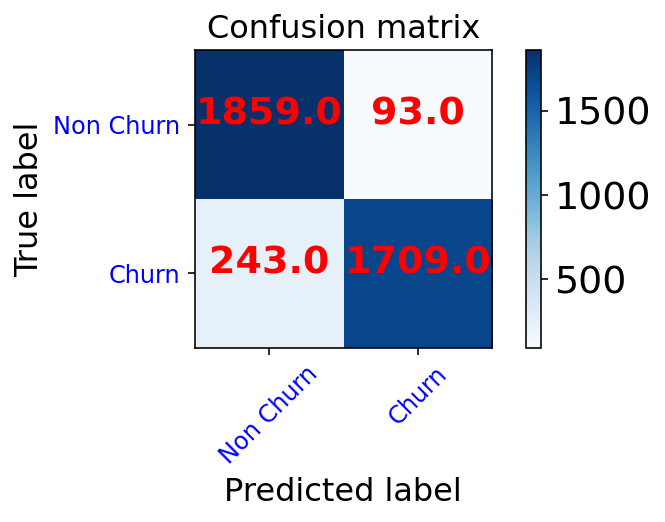

In [80]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],title='Confusion matrix')

In [81]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1859
False Positives:  93
False Negatives:  243
True Positives:  1709


In [82]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

y_test  y_pred
1       0       1
2       0       0
3       0       0
4       0       0
5       0       0

In [83]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)    

In [84]:
df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()

y_test  y_pred prediction_result
1       0       1                FP
2       0       0                TN
3       0       0                TN
4       0       0                TN
5       0       0                TN

In [85]:
df_pred[df_pred["prediction_result"] == "FP"].head()

y_test  y_pred prediction_result
1         0       1                FP
29        0       1                FP
69        0       1                FP
79        0       1                FP
103       0       1                FP

In [86]:
df_pred[df_pred["prediction_result"] == "FN"].head()

y_test  y_pred prediction_result
8        1       0                FN
20       1       0                FN
30       1       0                FN
34       1       0                FN
39       1       0                FN

# ROC Curve

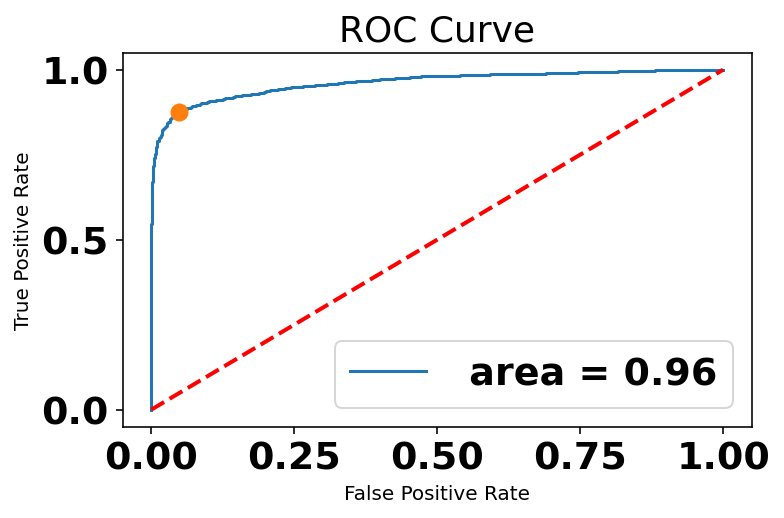

In [87]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,cohen_kappa_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## Result: 
The model created as a result of XGBoost hyperparameter optimization became the model with the maximum Accuracy:(0.913934), Balanced Accuracy:(0.913934), Recall:(0.875512), Cohen Kappa Score:(0.827869).

## Reporting:

The aim of this assignment was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read and preliminary data checks.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost like using machine learning models Accuracy  Score were calculated. Later XGBoost, LightGBM, CatBoost hyperparameter optimizations optimized to increase the Accuracy score.

5) Result: The model created as a result of XGBoost hyperparameter optimization became the model with the maximum Accuracy:(0.913934), Balanced Accuracy:(0.913934), Recall:(0.875512), Cohen Kappa Score:(0.827869).